In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
import warnings
warnings.filterwarnings("ignore")

качаем файл  


# **проводим первичный анализ данных**

In [130]:
url = "/content/heart.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [131]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [132]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


выводим распределение возраста по полу  
видим, что в рамках данного дата сета мужчин больше, чем женщин в каждой возрастной категории.

<Axes: xlabel='Age', ylabel='Count'>

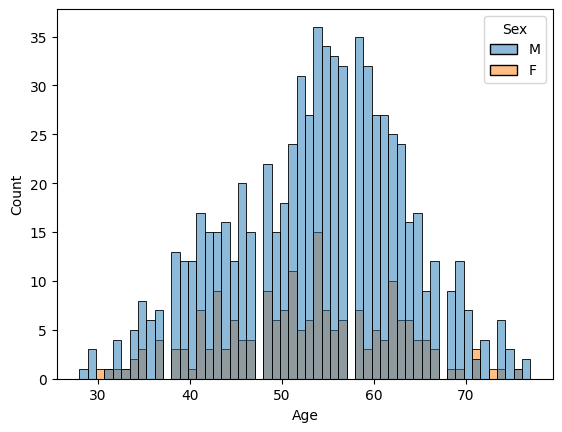

In [134]:
sns.histplot(data = df, x="Age", binwidth=0.9, hue="Sex")

изучим зависимость частоту сердечных заболиваний от возраста  

<Axes: xlabel='Age', ylabel='Count'>

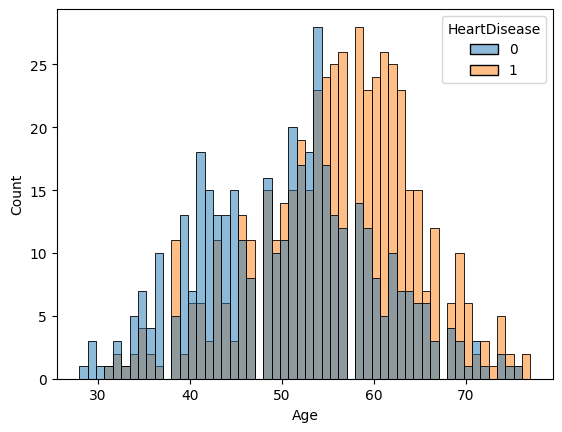

In [135]:
sns.histplot(data = df, x = 'Age', binwidth = 0.9, hue = "HeartDisease")

изучим процент заболевших для различного возраста.  

МНК

In [136]:
A = age_stats['Age']
b = age_stats['percentage']
A_t_A = A.transpose()@A
inv = 1/A_t_A
x_MGK =inv *A.transpose() @ b


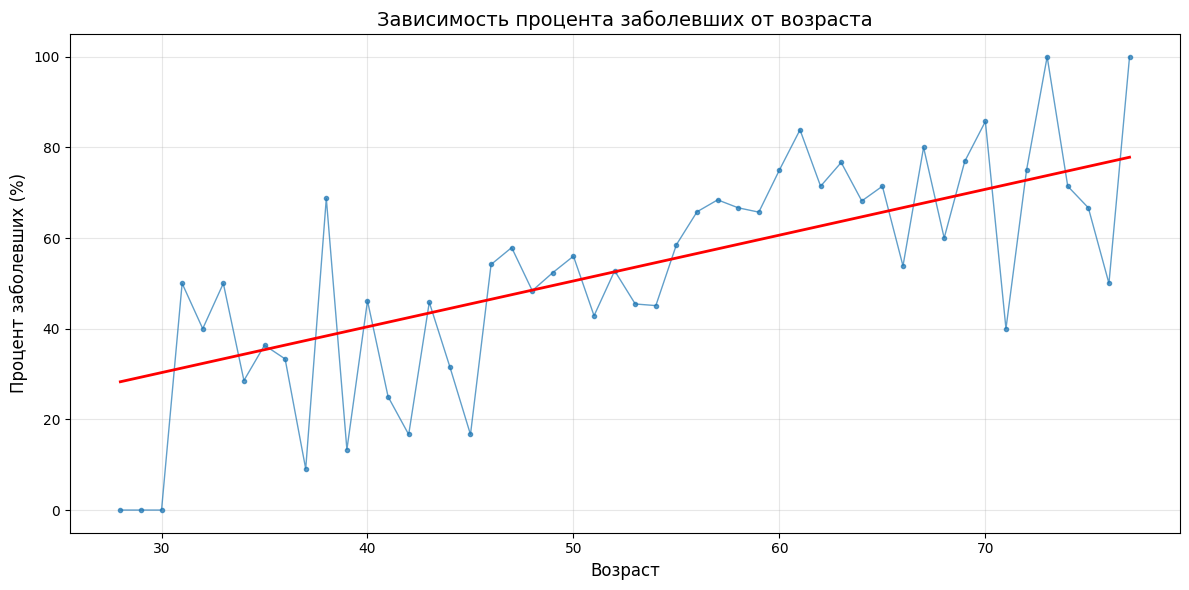

In [137]:
age_stats = df.groupby('Age')['HeartDisease'].agg(['count', 'sum']).reset_index()
age_stats['percentage'] = (age_stats['sum'] / age_stats['count']) * 100
plt.figure(figsize=(12, 6))
plt.plot(age_stats['Age'], age_stats['percentage'],
         marker='o', linestyle='-', linewidth=1, markersize=3, alpha=0.7)
def f(x):
   return x*x_MGK

# Создаем диапазон значений x для плавного графика
x_range = np.linspace(min(age_stats['Age']), max(age_stats['Age']), 100)
y_values = f(x_range)

# Добавляем ваш график
plt.plot(x_range, y_values, 'r-', linewidth=2, label='y = f(x)')


plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Процент заболевших (%)', fontsize=12)
plt.title('Зависимость процента заболевших от возраста', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

делаем проверку данных на соответствие нормальному распределению  

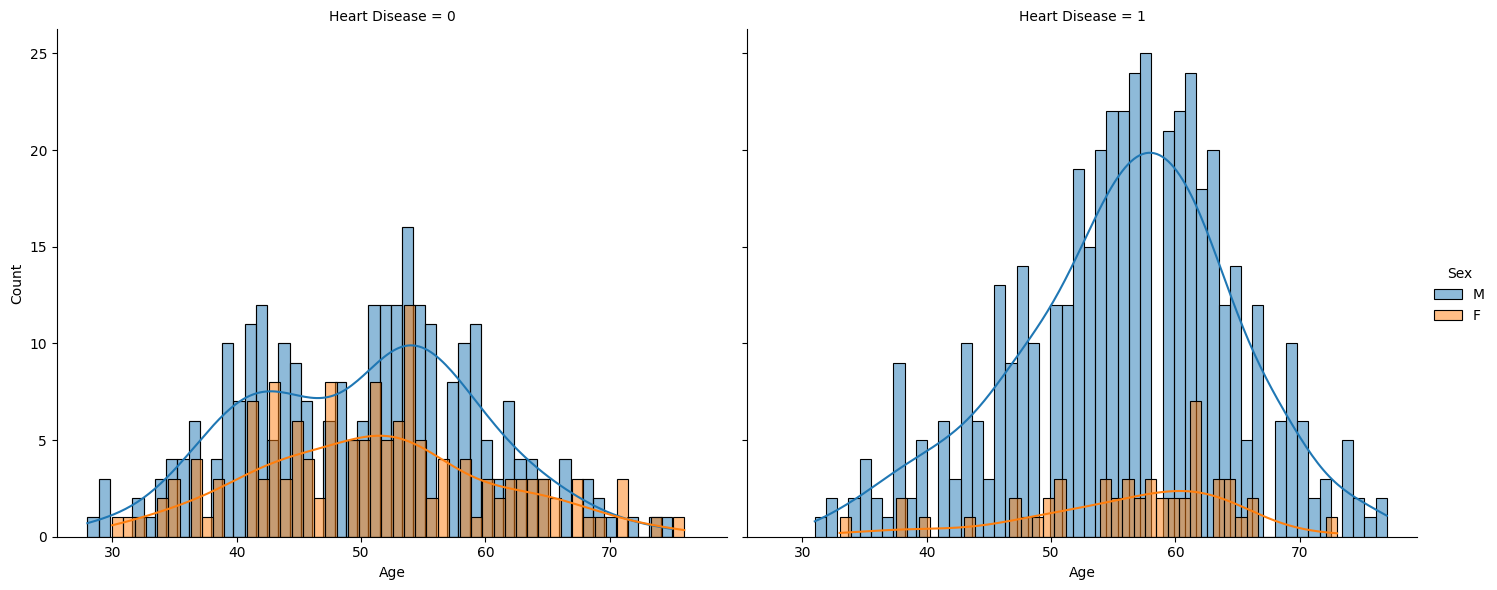

In [138]:
g = sns.FacetGrid(df, col="HeartDisease", height=6, aspect=1.2, hue = "Sex")
g.map(sns.histplot, "Age", binwidth=0.9, kde=True)
g.set_titles(col_template="Heart Disease = {col_name}")
g.add_legend()
plt.show()

график зависимости наличия заболевания от пола.  

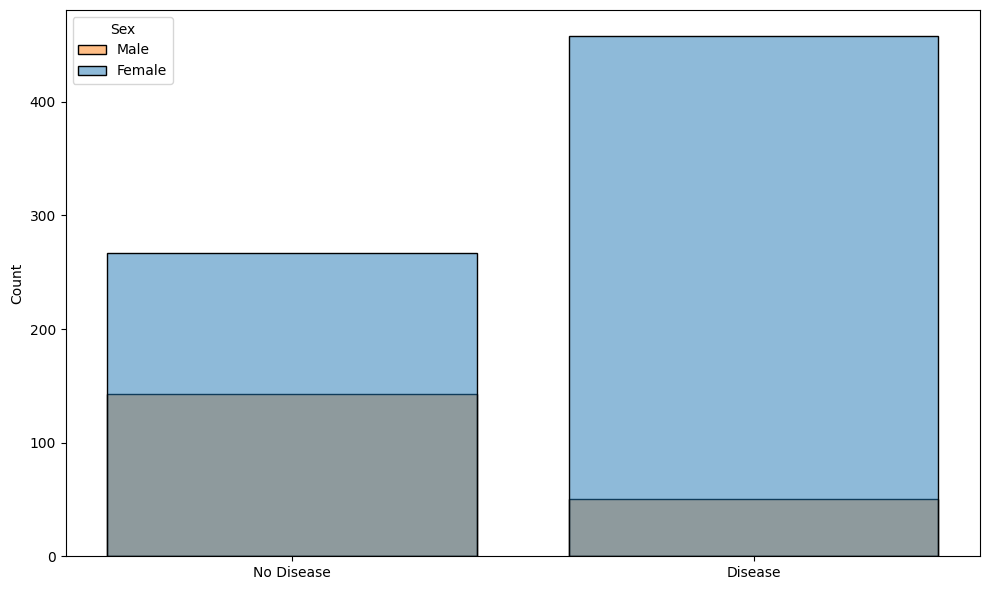

In [139]:
df['HeartDisease_Label'] = df['HeartDisease'].map({0: 'No Disease', 1: 'Disease'})

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="HeartDisease_Label", binwidth=0.1, hue="Sex", shrink=0.8)
plt.xlabel("")
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()
df = df.drop('HeartDisease_Label', axis = 1)

выведем всех людей с сердечными заболиваеями сгруппировав по полу.  
как видим, количество мужчин с сердечными заболеванием больше, чем количество женщин.  

<Axes: xlabel='Age', ylabel='Count'>

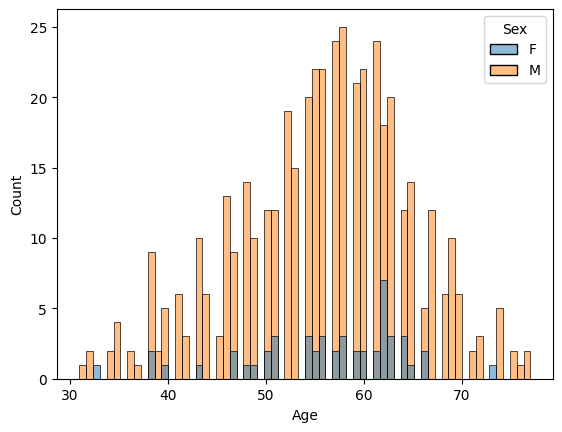

In [140]:
sns.histplot(data = df[df["HeartDisease"] == 1], x = "Age", binwidth = 0.7, hue = "Sex")

добавить график, ораньжевый столбец делить на синий. где ноль - не выводить.  

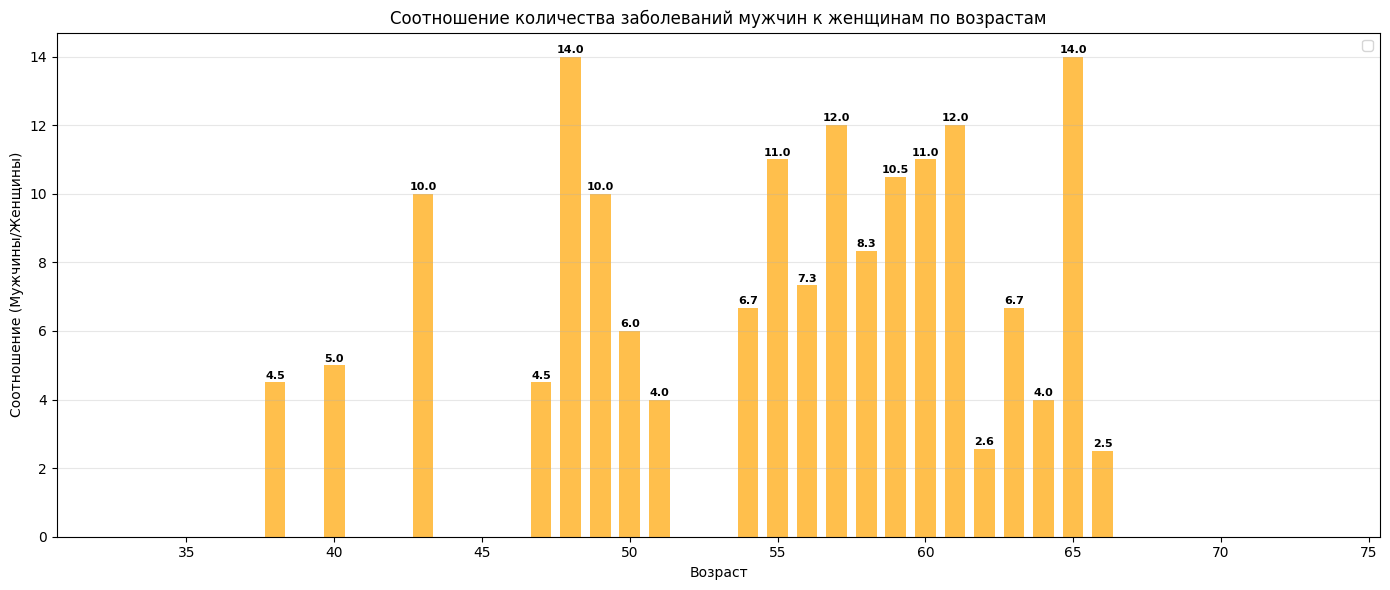

Общее количество мужчин с заболеваниями: 458
Общее количество женщин с заболеваниями: 50
Общее соотношение (М/Ж): 9.16


In [141]:
heart_disease_data = df[df["HeartDisease"] == 1]
age_gender_counts = heart_disease_data.groupby(['Age', 'Sex']).size().unstack(fill_value=0)

ratios = []
ages_with_ratio = []
for age in age_gender_counts.index:
    if 'F' in age_gender_counts.columns and 'M' in age_gender_counts.columns:
        female_count = age_gender_counts.loc[age, 'F']
        male_count = age_gender_counts.loc[age, 'M']

        if female_count > 0:
            ratio = male_count / female_count
            ratios.append(ratio)
            ages_with_ratio.append(age)
    elif 'Female' in age_gender_counts.columns and 'Male' in age_gender_counts.columns:
        female_count = age_gender_counts.loc[age, 'Female']
        male_count = age_gender_counts.loc[age, 'Male']

        if female_count > 0:
            ratio = male_count / female_count
            ratios.append(ratio)
            ages_with_ratio.append(age)

plt.figure(figsize=(14, 6))
if len(ages_with_ratio) > 0:
    bars = plt.bar(ages_with_ratio, ratios, color='orange', alpha=0.7, width=0.7)
    plt.xlabel('Возраст')
    plt.ylabel('Соотношение (Мужчины/Женщины)')
    plt.title('Соотношение количества заболеваний мужчин к женщинам по возрастам')
    plt.grid(axis='y', alpha=0.3)

    for i, (age, ratio) in enumerate(zip(ages_with_ratio, ratios)):
        if ratio > 0:
            plt.text(age, ratio + 0.05, f'{ratio:.1f}',
                    ha='center', va='bottom', fontsize=8, fontweight='bold')

    plt.legend()
else:
    plt.text(0.5, 0.5, 'Нет данных для расчета соотношений по возрастам',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Соотношение количества заболеваний мужчин к женщинам по возрастам')

plt.tight_layout()
plt.show()

total_male = heart_disease_data[heart_disease_data['Sex'].isin(['M', 'Male'])].shape[0]
total_female = heart_disease_data[heart_disease_data['Sex'].isin(['F', 'Female'])].shape[0]

print(f"Общее количество мужчин с заболеваниями: {total_male}")
print(f"Общее количество женщин с заболеваниями: {total_female}")
if total_female > 0:
    total_ratio = total_male / total_female
    print(f"Общее соотношение (М/Ж): {total_ratio:.2f}")

Теперь совершенно очевидно, что мужчин на порядок больше в датасете.

посмотрим какие типы боли наиболее распространнены у мужчин и женщин.  

<Axes: xlabel='Sex', ylabel='Count'>

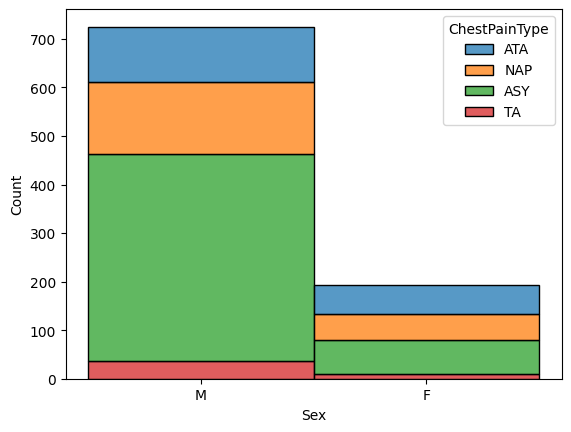

In [142]:
sns.histplot(data = df, x = "Sex", binwidth = 0.2, hue = "ChestPainType", multiple = "stack")

переделать, чтобы наличие заболевания было нормально подписано.  


выведем какой тип боли встречается у больных и здоровых.  

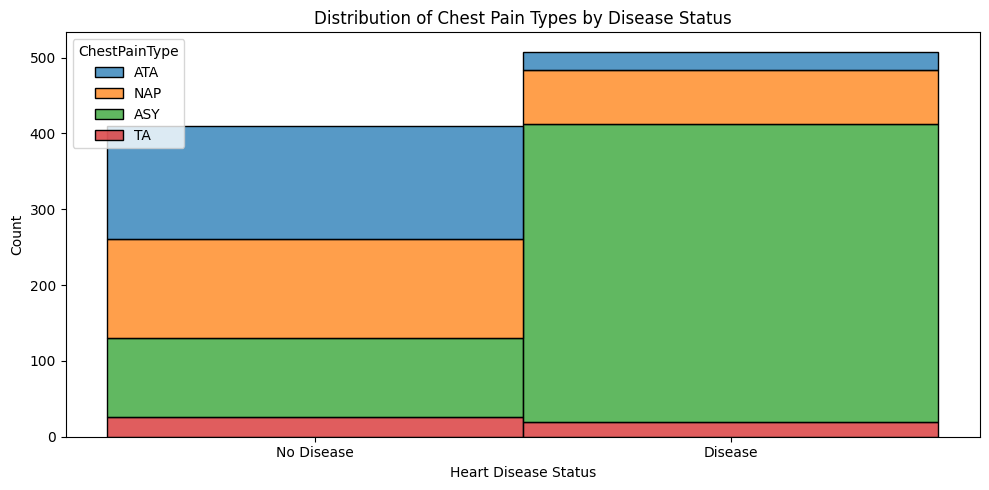

In [143]:
df['HeartDisease_Label'] = df['HeartDisease'].map({0: 'No Disease', 1: 'Disease'})

plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="HeartDisease_Label", binwidth=0.5,
                 hue="ChestPainType", multiple="stack")
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types by Disease Status')
plt.tight_layout()
plt.show()

df = df.drop('HeartDisease_Label', axis=1)

выведем матрицу кореляции числовых переменных.  

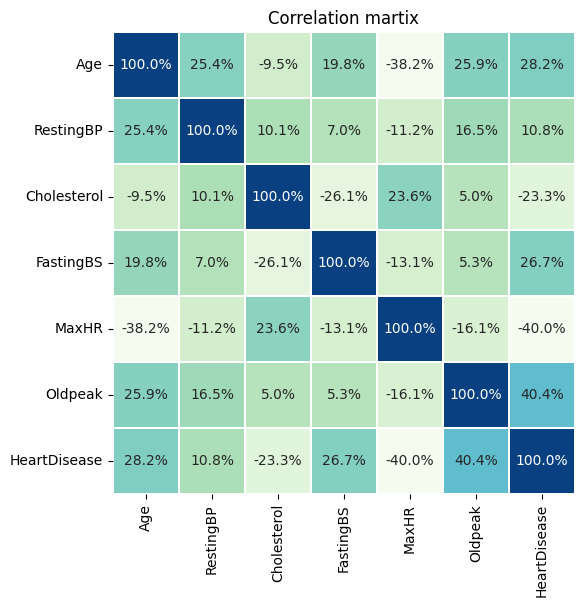

In [144]:
figure_size = (6, 6)
frontsize_annotation = 10
fig, ax = plt.subplots(figsize = figure_size)
plt.title("Correlation martix")
heatmap = sns.heatmap(df.select_dtypes(include = ["int64", "float64"]).corr(),
                   annot=True,
                   square=True,
                   fmt='.1%',
                   cmap='GnBu',
                   cbar=False,
                   annot_kws={'size':str(frontsize_annotation)},
                   linewidth=0.1
                  )

plt.show()

# **Начинаем создание модели**

создаём список из имён параметров которые являются типом "object".  

In [145]:
object_col = df.select_dtypes(include = "object").columns.to_list()

разбиваем параметры типа "object" по значениям, которые принимает переменная.   

In [146]:
df_non_tree = pd.get_dummies(df, columns=object_col,drop_first=False)
df_non_tree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


переводим True и False в 1 и 0.  
сохраняем целевую переменную в y.  
в X оставляем остальные переменные.  

In [147]:
y = df_non_tree["HeartDisease"].values
df_non_tree.drop("HeartDisease",axis=1,inplace=True)
df_non_tree=pd.concat([df_non_tree,df["HeartDisease"]],axis=1)
boolean_col = df_non_tree.select_dtypes(include = "boolean").columns.to_list()
df_non_tree[boolean_col] = df_non_tree[boolean_col].astype("int64")
X = df_non_tree.drop("HeartDisease",axis=1)
df_non_tree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


разбаваем дата сет поровну на тренировочный и тестовый набор данных.  


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

импортируем линейную регресию и среднюю кравдратичную ошибку из sklearn

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

обучаем модель на тренировочных данных.  
проводим тестирование на тестовых.  

In [150]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_predicted = model_linear.predict(X_test)

посмотрим на значение ошибок модели.  

In [151]:
print("Score ",model_linear.score(X,y))
print("Mse ", mse(y_predicted,y_test))
print("Rmse ", np.sqrt(mse(y_predicted,y_test)))

Score  0.5642446712348967
Mse  0.11911446836364954
Rmse  0.3451296399378783


выведим список предсказаний модели.  

округлим предсказанные значения выше 0.5 к 1.  
ниже к 0.  

In [152]:
for i in range(len(y_predicted)):
  if y_predicted[i] >= 0.5:
    y_predicted[i]=int(1)
  else:
    y_predicted[i] = int(0)
y_predicted = y_predicted.astype("int64")

выведем коэфиценты модели.  


In [153]:
model_linear.coef_
np.set_printoptions(suppress=True)
for i in range(model_linear.n_features_in_ - 1):
    print(f'{model_linear.feature_names_in_[i]} - { model_linear.coef_[i]}')

Age - 0.0018864448396186664
RestingBP - 0.000538622183772347
Cholesterol - -0.0006949631942801995
FastingBS - 0.1481074829480927
MaxHR - -0.0006393404138476484
Oldpeak - 0.04714029479886031
Sex_F - -0.06904747694346236
Sex_M - 0.06904747694346253
ChestPainType_ASY - 0.1547813124677582
ChestPainType_ATA - -0.10386827880566442
ChestPainType_NAP - -0.10018078457941541
ChestPainType_TA - 0.04926775091732169
RestingECG_LVH - 0.05099628578977261
RestingECG_Normal - -0.021626520902092758
RestingECG_ST - -0.029369764887679912
ExerciseAngina_N - -0.07242399334887935
ExerciseAngina_Y - 0.07242399334887933
ST_Slope_Down - 0.06620923658474057
ST_Slope_Flat - 0.15070010101688058


используем логистискую регресию.  
обучаем её на тренировачных данных.  


In [154]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(tol = 1e-100, max_iter=100000)
model_logistic.fit(X_train, y_train)
y_predicted_log = model_logistic.predict(X_test)

выводим значения ошибок модели

In [155]:
print("Score ",model_logistic.score(X,y))
print("Mse ", mse(y_test, model_logistic.predict(X_test)))

Score  0.8594771241830066
Mse  0.16122004357298475


выводим коэфиценты логистической регресии.  

In [156]:
for i in range(model_logistic.n_features_in_ - 1):
    print(f'{model_logistic.feature_names_in_[i]} - {model_logistic.coef_[0][i]}')

Age - 0.010944143027703919
RestingBP - 0.010993335766655765
Cholesterol - -0.006192802475361876
FastingBS - 1.1503730025774757
MaxHR - -0.00853970543433726
Oldpeak - 0.4040356085394328
Sex_F - -0.6079596813909809
Sex_M - 0.6079247613055628
ChestPainType_ASY - 1.1116646629311917
ChestPainType_ATA - -0.6166427640086128
ChestPainType_NAP - -0.6446018048169038
ChestPainType_TA - 0.14954498581472764
RestingECG_LVH - 0.5848197869851635
RestingECG_Normal - -0.21082243979364548
RestingECG_ST - -0.37403226728055494
ExerciseAngina_N - -0.46321091390153596
ExerciseAngina_Y - 0.46317599381434893
ST_Slope_Down - 0.2277181636466023
ST_Slope_Flat - 1.0857237233511325


# **Применим различные метрики к полученным результатам.**

Метрика accuracy.  

In [157]:
acc = 0
for i in range(len(y_predicted)):
  if y_predicted[i] == y_test[i]:
    acc+=1
print(acc/(len(y_predicted)))


0.8453159041394336


In [158]:
model_logistic.predict(X_test)
acc_1 = 0
for i in range(len(model_logistic.predict(X_test))):
  if model_logistic.predict(X_test)[i] == y_test[i]:
    acc_1+=1
print(acc_1/(len(model_logistic.predict(X_test))))

0.8387799564270153


Accuracy = Количество верных предсказаний / Общее количество примеров  
Видим, что обе модели в >80% случиях верно предсказывают результат.   

Метрика Sensitivity.  

In [159]:
true_positive = 0
false_negative = 0
sensitivity = 0
for i in range(len(y_predicted)):
    if y_test[i] == 1:
        if y_predicted[i] == 1:
            true_positive += 1
        else:
            false_negative += 1
sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Sensitivity: {sensitivity:.4f}")
print(f"True Positive: {true_positive}")
print(f"False Negative: {false_negative}")

Sensitivity: 0.9114
True Positive: 216
False Negative: 21


In [160]:
y_pred = model_logistic.predict(X_test)
true_positive = 0
false_negative = 0
sensitivity = 0
for i in range(len(y_pred)):
    if y_test[i] == 1:
        if y_pred[i] == 1:
            true_positive += 1
        else:
            false_negative += 1
sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Sensitivity: {sensitivity:.4f}")
print(f"True Positive: {true_positive}")
print(f"False Negative: {false_negative}")

Sensitivity: 0.9156
True Positive: 217
False Negative: 20


Sensitivity = Количество правильно обнаруженных больных / Количество реально больных людей  
Эта метрика показывает: какую долю действительно больных людей модель смогла правильно идентифицировать.  
в >84% случаях модели найдут у больного человека заболевание.    

Метрика Precision.  

In [161]:
true_positive = 0
false_positive = 0
precision = 0
for i in range(len(y_predicted)):
    if y_predicted[i] == 1:
        if y_test[i] == 1:
            true_positive += 1
        else:
            false_positive += 1
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"True Positive: {true_positive}")
print(f"False Positive: {false_positive}")

Precision: 0.8120
True Positive: 216
False Positive: 50


In [162]:
y_pred = model_logistic.predict(X_test)
true_positive = 0
false_positive = 0
precision = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        if y_test[i] == 1:
            true_positive += 1
        else:
            false_positive += 1
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"True Positive: {true_positive}")
print(f"False Positive: {false_positive}")

Precision: 0.8007
True Positive: 217
False Positive: 54


Precision = Количество правильно обнаруженных больных / Количество людей, которых модель назвала больными  
Эта метрика показывает: Долю действительно больных среди тех, кого модель назвала больными.  
в >83% модель правильно определяет людей с заболеванием.  

# **Итог**
Провёл анализ датасета.
Вывел графики по различным параметрам.
В датасете преобладает информация о мужчинах.
Реализовал линейную и логистическую регресии.
Провёл тесты на трёх метриках.
Во всёх тестах результаты около 85%.  